<a href="https://colab.research.google.com/github/vicduch/apprentissageMLPython/blob/main/Apprentissage_Python_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Séléction de données

## Différence .loc et .iloc

In [ ]:
import pandas as pd

donnees = {
    'Age': [45, 52, 34, 29, 68],
    'Genre': ['H', 'F', 'F', 'H', 'F'],
    'TensionArtérielle': [120, 132, 115, 118, 140],
    'Cholestérol': [210, 240, 190, 180, 260]
}
index_patients = ['P001', 'P002', 'P003', 'P004', 'P005']

df_patients = pd.DataFrame(donnees, index=index_patients)

print("Voici le DataFrame de départ :")
print(df_patients)

Voici le DataFrame de départ :
      Age Genre  TensionArtérielle  Cholestérol
P001   45     H                120          210
P002   52     F                132          240
P003   34     F                115          190
P004   29     H                118          180
P005   68     F                140          260


#### Tâches à effectuer :

1. Sélectionnez et affichez toutes les informations du patient avec l'identifiant 'P002'.

2. Sélectionnez et affichez la valeur unique de la tension artérielle (TensionArtérielle) pour le patient 'P005'.

3. En utilisant uniquement des positions numériques, sélectionnez et affichez les données des deux premiers patients (P001 et P002) pour les colonnes Genre et TensionArtérielle.

4. En utilisant uniquement des positions numériques, sélectionnez et affichez un "sous-DataFrame" contenant les trois dernières lignes et les deux dernières colonnes.

In [ ]:
données_p002 = df_patients.loc['P002']
print("\nDonnées du patient P002 :")
print(données_p002)

tension_p005 = df_patients.loc['P005', 'TensionArtérielle']
print("\nTension du patient P005 :")
print(tension_p005)

deux_premiers_patients = df_patients.iloc[:2, [1,2]]
print("\nDeux premiers patients :")
print(deux_premiers_patients)

sous_df = df_patients.iloc[-3:,-2:]
print(sous_df)



Données du patient P002 :
Age                   52
Genre                  F
TensionArtérielle    132
Cholestérol          240
Name: P002, dtype: object

Tension du patient P005 :
140

Deux premiers patients :
     Genre  TensionArtérielle
P001     H                120
P002     F                132
      TensionArtérielle  Cholestérol
P003                115          190
P004                118          180
P005                140          260


#### *Remarques : Attention à bien utiliser les index de colonnes dans .iloc*

## Filtrage conditionnel

#### Tâches à effectuer

En réutilisant le même dataset

1. Créez un nouveau DataFrame, df_seniors, qui contient uniquement les patients de plus de 50 ans.

2. Créez un nouveau DataFrame, df_femmes, qui contient uniquement les patientes (Genre égal à 'F').

3. Vous suspectez un risque cardiovasculaire accru chez certaines patientes. Créez un DataFrame df_risque_eleve qui ne contient que les patientes (Genre 'F') qui ont également un taux de cholestérol supérieur à 200.

In [ ]:
seniors = df_patients['Age']>50
df_seniors = df_patients[seniors]
print(df_seniors)

femmes = df_patients['Genre']=='F'
df_femmes = df_patients[femmes]
print(df_femmes)

risque_eleve = df_patients['Cholestérol']>200
df_risque_eleve = df_patients[(femmes) & (risque_eleve)]
print(df_risque_eleve)

      Age Genre  TensionArtérielle  Cholestérol
P002   52     F                132          240
P005   68     F                140          260
      Age Genre  TensionArtérielle  Cholestérol
P002   52     F                132          240
P003   34     F                115          190
P005   68     F                140          260
      Age Genre  TensionArtérielle  Cholestérol
P002   52     F                132          240
P005   68     F                140          260


#### *Remarques : Bien penser à écrire sur la même ligne pour simplifier :*

```
df_risque_eleve_alt = df_patients[(df_patients['Genre'] == 'F') & (df_patients['Cholestérol'] > 200)]
```




# Création et modifications de données

## Création de colonnes


In [ ]:
import pandas as pd

donnees = {
    'Age': [45, 52, 34, 29, 68],
    'Genre': ['H', 'F', 'F', 'H', 'F'],
    'TensionArtérielle': [120, 132, 115, 118, 140],
    'Cholestérol': [210, 240, 190, 180, 260]
}
index_patients = ['P001', 'P002', 'P003', 'P004', 'P005']

df_patients = pd.DataFrame(donnees, index=index_patients)

#### Tâches à effectuer
1. Nous sommes en 2025. Créez une nouvelle colonne nommée AnneeNaissance qui contient l'année de naissance approximative de chaque patient.

2. Pour évaluer un facteur de risque, un chercheur a émis l'hypothèse qu'un indice *Cholestérol/Age* pourrait être pertinent. Créez une nouvelle colonne nommée IndiceRisque qui contient le résultat de cette division.

3. Après avoir créé les deux colonnes, affichez le DataFrame complet pour vérifier le résultat.

In [ ]:
df_patients['AnneeNaissance'] = 2025 - df_patients['Age']
print(df_patients['AnneeNaissance'])

df_patients['IndiceRisque'] = df_patients['Cholestérol']/df_patients['Age']
print(df_patients['IndiceRisque'])

print(df_patients)

P001    1980
P002    1973
P003    1991
P004    1996
P005    1957
Name: AnneeNaissance, dtype: int64
P001    4.666667
P002    4.615385
P003    5.588235
P004    6.206897
P005    3.823529
Name: IndiceRisque, dtype: float64
      Age Genre  TensionArtérielle  Cholestérol  AnneeNaissance  IndiceRisque
P001   45     H                120          210            1980      4.666667
P002   52     F                132          240            1973      4.615385
P003   34     F                115          190            1991      5.588235
P004   29     H                118          180            1996      6.206897
P005   68     F                140          260            1957      3.823529


*Remarques :*

La création de la colonne IndiceRisque est un exemple simple mais fondamental de ce que l'on appelle le Feature Engineering (création de variables).

À votre avis, pourquoi un indice comme celui-ci pourrait être plus puissant pour un modèle de Machine Learning que de simplement utiliser les colonnes Age et Cholestérol séparément ?

... C'est parce que cet indice capture une interaction entre les deux variables. Un taux de cholestérol de 260 n'a pas la même signification pour une personne de 29 ans que pour une personne de 68 ans. Votre nouvelle variable IndiceRisque contient cette information nuancée en un seul chiffre. C'est en créant ce genre de variables pertinentes que les data scientists apportent le plus de valeur.

## Création de colonnes conditionnelle

#### Tâches à effectuer

1. Créez une nouvelle colonne CategorieTension. Si la TensionArtérielle d'un patient est strictement supérieure à 125, la valeur doit être 'Haute'. Sinon, la valeur doit être 'Normale'.

2. Créez une colonne StatutRisque. Le statut doit être 'Élevé' uniquement si l'IndiceRisque est supérieur à 4.5 ET que l'Age est supérieur à 50. Dans tous les autres cas, le statut doit être 'Normal'.

3. Affichez le DataFrame final avec ces deux nouvelles colonnes de catégories.

In [ ]:
import numpy as np

df_patients['CategorieTension'] = np.where(df_patients['TensionArtérielle']>125,'Haute','Normale')
print(df_patients['CategorieTension'])

df_patients['StatutRisque'] = np.where((df_patients['IndiceRisque']>4.5) & (df_patients['Age']>50), 'Elevé', 'Normal')
print(df_patients['StatutRisque'])

print(df_patients)

P001    Normale
P002      Haute
P003    Normale
P004    Normale
P005      Haute
Name: CategorieTension, dtype: object
P001    Normal
P002     Elevé
P003    Normal
P004    Normal
P005    Normal
Name: StatutRisque, dtype: object
      Age Genre  TensionArtérielle  Cholestérol  AnneeNaissance  IndiceRisque  \
P001   45     H                120          210            1980      4.666667   
P002   52     F                132          240            1973      4.615385   
P003   34     F                115          190            1991      5.588235   
P004   29     H                118          180            1996      6.206897   
P005   68     F                140          260            1957      3.823529   

     CategorieTension StatutRisque  
P001          Normale       Normal  
P002            Haute        Elevé  
P003          Normale       Normal  
P004          Normale       Normal  
P005            Haute       Normal  


## Exo récap session 1

#### Tâches à effectuer

1. Sélection : En utilisant la méthode la plus appropriée, sélectionnez et affichez la ligne correspondant au produit dont l'identifiant est 'PROD-004'.

2. Filtrage : Créez un nouveau DataFrame df_top_produits qui contient uniquement les produits de la catégorie 'Cuisine' ayant réalisé plus de 100 ventes mensuelles.

3. Création de colonne (calcul) : Créez une nouvelle colonne ChiffreAffaires qui correspond au revenu généré par chaque produit (PrixUnitaire * VentesMensuelles).

4. Création de colonne (conditionnelle) : Le service marketing souhaite identifier les "Produits Vedettes". Créez une colonne Statut qui aura la valeur 'Vedette' si la NoteClient est supérieure ou égale à 4.5 ET que le ChiffreAffaires est supérieur à 5000. Dans tous les autres cas, la valeur sera 'Standard'.

Bonus : Affichez uniquement les colonnes NomProduit et Statut des produits qui ont été classés 'Vedette'.


In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']

df_ventes = pd.DataFrame(catalogue, index=id_produits)

print("Voici le DataFrame de départ :")
print(df_ventes)

Voici le DataFrame de départ :
             NomProduit      Categorie  PrixUnitaire  VentesMensuelles  \
PROD-001    Cafetière A        Cuisine         59.90               150   
PROD-002   Bouilloire B        Cuisine         29.99               230   
PROD-003  Grille-pain C        Cuisine         45.00                80   
PROD-004       Mixeur D        Cuisine         79.50               110   
PROD-005        Robot E  Petit-Électro        249.99                35   

          NoteClient  
PROD-001         4.6  
PROD-002         4.8  
PROD-003         4.2  
PROD-004         4.9  
PROD-005         4.1  


In [ ]:
#Question 1

p004 = df_ventes.loc["PROD-004"]
print(p004)

#Question 2
df_cuisine_100 = df_ventes[(df_ventes["Categorie"] == "Cuisine") & (df_ventes["VentesMensuelles"]>100)]
print(df_cuisine_100)

#Question 3
df_ventes['ChiffresAffaires'] = df_ventes['PrixUnitaire']*df_ventes['VentesMensuelles']
print(df_ventes)

#Question 4
produits_vedettes = (df_ventes['NoteClient']>4.5)&(df_ventes['ChiffresAffaires']>5000)
df_ventes['Statut'] = np.where(produits_vedettes,'Vedettes','Standard')
print(df_ventes['Statut'])

#Bonus
df_bonus = df_ventes.loc[df_ventes['Statut']=='Vedettes',["NomProduit","Statut"]]
print(df_bonus)

NomProduit          Mixeur D
Categorie            Cuisine
PrixUnitaire            79.5
VentesMensuelles         110
NoteClient               4.9
ChiffresAffaires      8745.0
Statut              Vedettes
Name: PROD-004, dtype: object
            NomProduit Categorie  PrixUnitaire  VentesMensuelles  NoteClient  \
PROD-001   Cafetière A   Cuisine         59.90               150         4.6   
PROD-002  Bouilloire B   Cuisine         29.99               230         4.8   
PROD-004      Mixeur D   Cuisine         79.50               110         4.9   

          ChiffresAffaires    Statut  
PROD-001            8985.0  Vedettes  
PROD-002            6897.7  Vedettes  
PROD-004            8745.0  Vedettes  
             NomProduit      Categorie  PrixUnitaire  VentesMensuelles  \
PROD-001    Cafetière A        Cuisine         59.90               150   
PROD-002   Bouilloire B        Cuisine         29.99               230   
PROD-003  Grille-pain C        Cuisine         45.00                

*Beaucoup d'erreurs faites pour la question 2 : toujours bien utiliser une selection de df_ventes, donc

```
df_ventes[(df_ventes[condition1])&(df_ventes[condition2])]
```



## GroupBy

In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']
produits_vedettes = (df_ventes['NoteClient'] >= 4.5) & (df_ventes['ChiffreAffaires'] > 5000)
df_ventes['Statut'] = np.where(produits_vedettes, 'Vedette', 'Standard')

print("Rappel du DataFrame final :")
print(df_ventes)

Rappel du DataFrame final :
             NomProduit      Categorie  PrixUnitaire  VentesMensuelles  \
PROD-001    Cafetière A        Cuisine         59.90               150   
PROD-002   Bouilloire B        Cuisine         29.99               230   
PROD-003  Grille-pain C        Cuisine         45.00                80   
PROD-004       Mixeur D        Cuisine         79.50               110   
PROD-005        Robot E  Petit-Électro        249.99                35   

          NoteClient  ChiffreAffaires    Statut  
PROD-001         4.6          8985.00   Vedette  
PROD-002         4.8          6897.70   Vedette  
PROD-003         4.2          3600.00  Standard  
PROD-004         4.9          8745.00   Vedette  
PROD-005         4.1          8749.65  Standard  


#### Tâches à effectuer

1. Calculez le chiffre d'affaires total pour chaque Categorie.

2. Calculez la note client moyenne pour chaque Categorie.

3. Comptez le nombre de produits qu'il y a dans chaque Statut ('Vedette' et 'Standard'). Pour cela, vous pouvez grouper par Statut et compter les NomProduit.

In [ ]:
df_ca_groupe = df_ventes.groupby(df_ventes['Categorie'])['ChiffreAffaires'].sum()
print(df_ca_groupe)

df_ca_groupe = df_ventes.groupby(df_ventes['Categorie'])['NoteClient'].mean()
print(df_ca_groupe)

df_ca_groupe = df_ventes.groupby(df_ventes['Statut'])['NomProduit'].count()
print(df_ca_groupe)

Categorie
Cuisine          28227.70
Petit-Électro     8749.65
Name: ChiffreAffaires, dtype: float64
Categorie
Cuisine          4.625
Petit-Électro    4.100
Name: NoteClient, dtype: float64
Statut
Standard    2
Vedette     3
Name: NomProduit, dtype: int64


## Agg

In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']
produits_vedettes = (df_ventes['NoteClient'] >= 4.5) & (df_ventes['ChiffreAffaires'] > 5000)
df_ventes['Statut'] = np.where(produits_vedettes, 'Vedette', 'Standard')

#### Tâches à effectuer

1. Agrégation simple : En groupant par Categorie, utilisez .agg() avec une liste pour calculer la somme (sum), la moyenne (mean), le minimum (min) et le maximum (max) de la colonne ChiffreAffaires.

2. Agrégation avancée : En groupant par Categorie, utilisez .agg() avec un dictionnaire pour créer un rapport qui calcule :
- Le total du ChiffreAffaires (sum).
- La moyenne de la NoteClient (mean).
- Le nombre de produits dans la catégorie (en utilisant count sur NomProduit).

In [ ]:
df_ca_agg_simple = df_ventes.groupby('Categorie')['ChiffreAffaires'].agg(['sum','mean','min','max'])
print(df_ca_agg_simple)

aggreg_dict = {'ChiffreAffaires':'sum','NoteClient':'mean','NomProduit':'count'}
df_ca_agg_adv = df_ventes.groupby('Categorie').agg(aggreg_dict)
print(df_ca_agg_adv)

                    sum      mean      min      max
Categorie                                          
Cuisine        28227.70  7056.925  3600.00  8985.00
Petit-Électro   8749.65  8749.650  8749.65  8749.65
               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Cuisine               28227.70       4.625           4
Petit-Électro          8749.65       4.100           1


## Trier les valeurs

In [ ]:
import pandas as pd
import numpy as np

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35],
    'NoteClient': [4.6, 4.8, 4.2, 4.9, 4.1]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']
produits_vedettes = (df_ventes['NoteClient'] >= 4.5) & (df_ventes['ChiffreAffaires'] > 5000)
df_ventes['Statut'] = np.where(produits_vedettes, 'Vedette', 'Standard')

# Création directe du rapport
aggreg_dict = {'ChiffreAffaires': 'sum', 'NoteClient': 'mean', 'NomProduit': 'count'}
df_rapport = df_ventes.groupby('Categorie').agg(aggreg_dict)

print("Voici le rapport non trié :")
print(df_rapport)

Voici le rapport non trié :
               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Cuisine               28227.70       4.625           4
Petit-Électro          8749.65       4.100           1


#### Tâches à effectuer

1. Affichez le rapport trié par ChiffreAffaires décroissant (la catégorie la plus performante en premier).

2. Affichez le rapport trié par NoteClient croissant (la catégorie avec la moins bonne note moyenne en premier).

In [ ]:
print(df_rapport.sort_values(by = 'ChiffreAffaires',ascending = False))
print(df_rapport.sort_values(by = 'NoteClient',ascending = True))


               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Cuisine               28227.70       4.625           4
Petit-Électro          8749.65       4.100           1
               ChiffreAffaires  NoteClient  NomProduit
Categorie                                             
Petit-Électro          8749.65       4.100           1
Cuisine               28227.70       4.625           4


# Visualisation de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Importation conventionnelle de Matplotlib

catalogue = {
    'NomProduit': ['Cafetière A', 'Bouilloire B', 'Grille-pain C', 'Mixeur D', 'Robot E'],
    'Categorie': ['Cuisine', 'Cuisine', 'Cuisine', 'Cuisine', 'Petit-Électro'],
    'PrixUnitaire': [59.90, 29.99, 45.00, 79.50, 249.99],
    'VentesMensuelles': [150, 230, 80, 110, 35]
}
id_produits = ['PROD-001', 'PROD-002', 'PROD-003', 'PROD-004', 'PROD-005']
df_ventes = pd.DataFrame(catalogue, index=id_produits)
df_ventes['ChiffreAffaires'] = df_ventes['PrixUnitaire'] * df_ventes['VentesMensuelles']

# On crée le rapport agrégé qui nous servira de source pour le graphique
rapport_ca = df_ventes.groupby('Categorie')['ChiffreAffaires'].sum()

print("Données à visualiser :")
print(rapport_ca)

Données à visualiser :
Categorie
Cuisine          28227.70
Petit-Électro     8749.65
Name: ChiffreAffaires, dtype: float64


#### Tâches à effectuer
En utilisant matplotlib.pyplot (alias plt), créez un diagramme en barres simple qui montre le chiffre d'affaires pour chaque catégorie.

Indices :
1. La fonction principale à utiliser est plt.bar().
2. Cette fonction a besoin de savoir ce qu'il faut mettre sur l'axe des X (les catégories) et sur l'axe des Y (le chiffre d'affaires).
3. Pour un objet Série comme rapport_ca, vous pouvez accéder aux catégories avec rapport_ca.index et aux valeurs avec rapport_ca.values.
4. Après avoir défini votre graphique, utilisez plt.show() pour l'afficher.



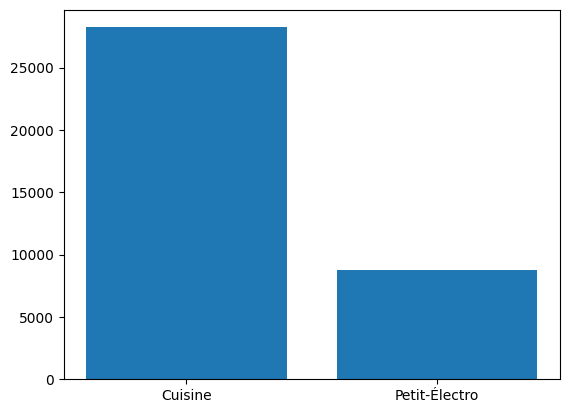

In [2]:
plt.bar(rapport_ca.index, rapport_ca.values)
plt.show()

#### Tâches à effectuer

En partant de votre code plt.bar(...), ajoutez-lui :

1. Le titre : "Chiffre d'Affaires Total par Catégorie"
2. L'étiquette de l'axe X : "Catégorie de Produit"
3. L'étiquette de l'axe Y : "Chiffre d'Affaires (en €)"

#### Bar chart vertical

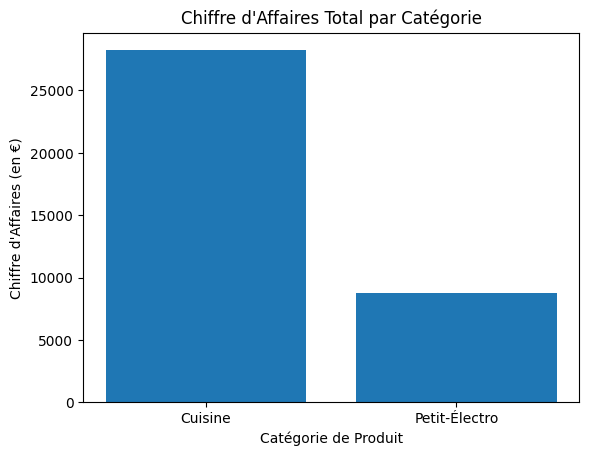

In [4]:
plt.bar(rapport_ca.index, rapport_ca.values)
plt.title("Chiffre d'Affaires Total par Catégorie")
plt.xlabel("Catégorie de Produit")
plt.ylabel("Chiffre d'Affaires (en €)")
plt.show()

#### Bar chart horizontal

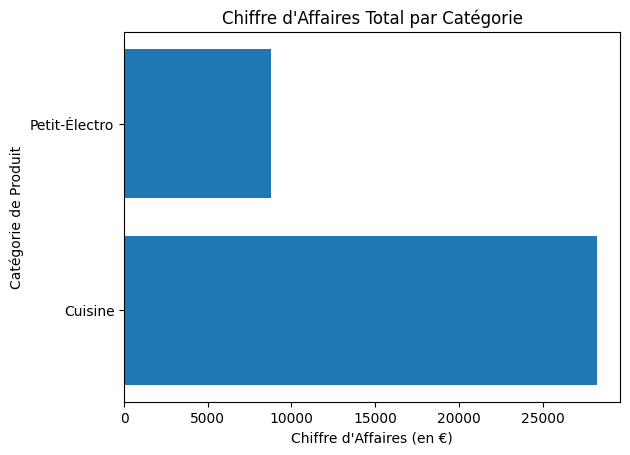

In [3]:
plt.barh(rapport_ca.index, rapport_ca.values)
plt.title("Chiffre d'Affaires Total par Catégorie")
plt.ylabel("Catégorie de Produit")
plt.xlabel("Chiffre d'Affaires (en €)")
plt.show()